In [1]:
# import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

#  Step 1: Download Stock Data
stock_symbol = 'TSLA'  
data = yf.download(stock_symbol, start='2020-01-01', end='2024-12-31')
print("Data shape:", data.shape)
data.head()


C:\Users\R Y Z E N\AppData\Local\Temp\ipykernel_31208\1534356829.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, start='2020-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed

Data shape: (1257, 5)


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500


In [2]:
#  Shift Close price 1 day up to make it the "label" for today
data['NextClose'] = data['Close'].shift(-1)

#  Drop last row with NaN in 'NextClose'
data.dropna(inplace=True)

#  Use these columns as features
features = ['Open', 'High', 'Low', 'Volume']
target = 'NextClose'

X = data[features]
y = data[target]


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [4]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [5]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [6]:
def evaluate(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{model_name}:\n  MAE: {mae:.2f}\n  RMSE: {rmse:.2f}\n")

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest")


Linear Regression:
  MAE: 6.90
  RMSE: 10.08

Random Forest:
  MAE: 8.91
  RMSE: 14.13



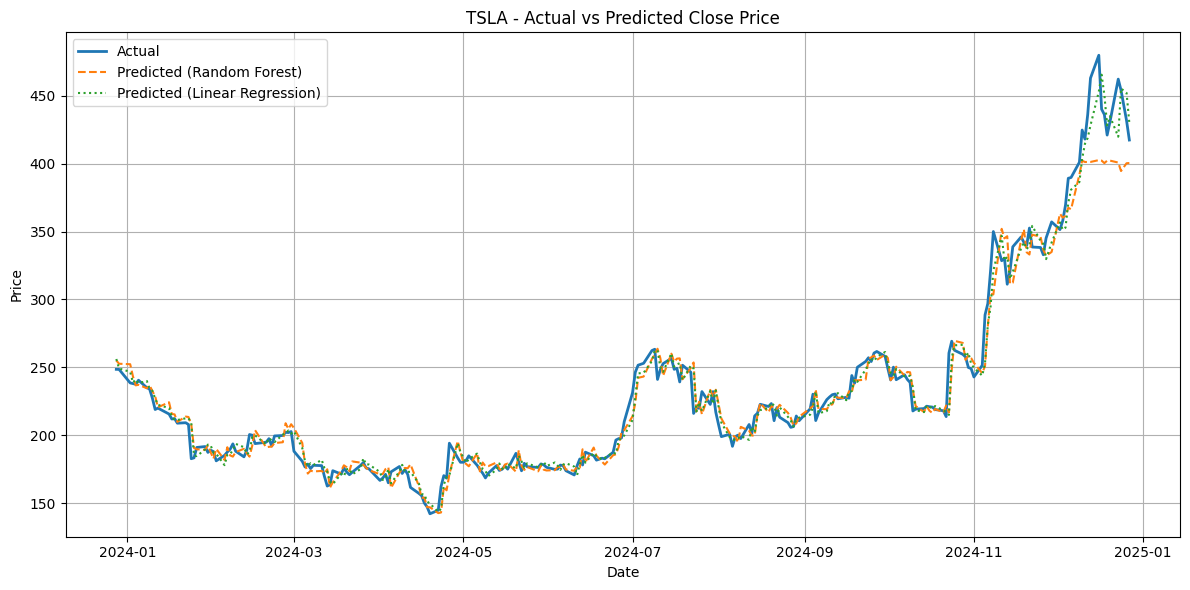

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual', linewidth=2)
plt.plot(y_test.index, y_pred_rf, label='Predicted (Random Forest)', linestyle='--')
plt.plot(y_test.index, y_pred_lr, label='Predicted (Linear Regression)', linestyle=':')
plt.title(f"{stock_symbol} - Actual vs Predicted Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
